# Máquina de Atwood

[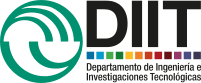](https://ingenieria.unlam.edu.ar/)  
2022 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 

---

## Enunciado
1. Obtenga con la ecuación de Euler-Lagrange la ecuación de la dinámica. 
Simplifique el problema considerando que la poleas de radio \\(R\\) tiene masa nula (\\(M=0\\)).
2. Compare las aceleraciones con las obtenidas usando ecuaciones de Newton.  

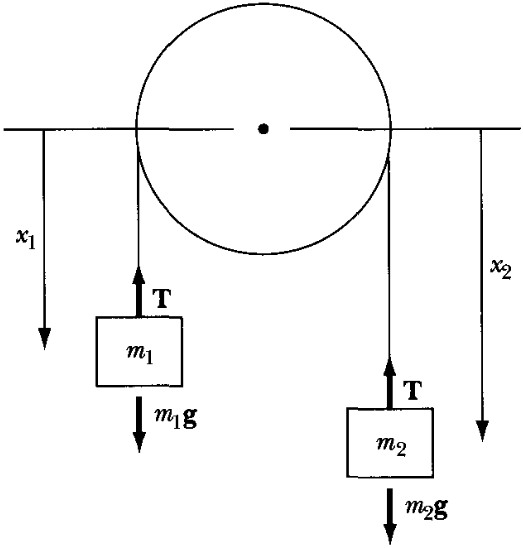

## Resolución simbólica en el formalismo Lagrangiano
A continuación se obtiene la ecuación Lagrangiana, sino que también se resolverá la correspondiente de Euler-Lagrange con las funciones del módulo `sympy`.

In [1]:
import sympy as sym # módulo de cálculo simbólico
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
# import warnings
# warnings.filterwarnings("ignore")

### Variables

In [2]:
# Sistema de coordenadas
e = mech.ReferenceFrame('e') # sistema de coordenadas
t = sym.symbols('t') # tiempo

# Parámetros físicos del sistema
M, R, m1, m2, g, l = sym.symbols('M, R, m_1, m_2, g, \ell', positive=True)

# Coordenadas generalizadas 
x1, x2 = mech.dynamicsymbols('x_1, x_2')

### Ligadura
La cuerda inextensible establece una ligadura entre las coordenadas de ambas partículas que cuelgan de la polea.
- La cuerda de longitud $l$ impone $x_1+ x_2 + \pi R = \ell$ siendo $R$ el radio de la polea que se la considera sin masa.
- De las dos coordenadas generalizadas: $x_1,x_2$ la existencia de una función de ligadura hace que solo se requiera.
- Se escribe tala relación como una función homogénea (igualada al valor nulo $0$)
$$
f_1(x_1, x_2) = x_1+ x_2 + \pi R - \ell = 0
$$ 

In [3]:
# Ligaduras
f1 = sym.Eq(x1+ x2 + sym.pi* R - l, 0 ) # ligadura l como función homogénea
f1

In [4]:
x2_f1 =  sym.solveset(f1.rhs, x2).args[0]
sym.Eq(x2, x2_f1)

IndexError: tuple index out of range

### Posiciones en función de coordenas generalizadas

In [ ]:
m1_r = x1* (-e.y) # versor y para arriba
m2_r = x2_f1* (-e.y) # resto longitud hilo x1 y media vuelta polea
m1_r, m2_r

### Energía cinética

In [ ]:
# velocidad
m1_v = m1_r.diff(t, e) # se indica que se deriva en sistema de referencia o
m2_v = m2_r.diff(t, e) # se indida que se deriva en sistema de referencia o
m1_v, m2_v

In [ ]:
# velocidad al cuadrado
m1_v2 = m1_v.dot(m1_v) # vector producto punto con sigo mismo
m2_v2 = m2_v.dot(m2_v) # vector producto punto con sigo mismo
m1_v2, m2_v2

In [ ]:
# Energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
T_m1 = unMedio* m1* m1_v2
T_m2 = unMedio* m2* m1_v2
T = sym.Eq(sym.Symbol('T'), (T_m1 + T_m2).simplify() ) # simplify: simplifica usando factor común y otras operaciones
T

### Energía potencial

In [ ]:
# Energía potencial
g_vector = g* (-e.y) # aceleración gravitatoria en -y versor
V_m1 = m1* (-g_vector).dot(m1_r)
V_m2 = m2* (-g_vector).dot(m2_r)
V = sym.Eq(sym.Symbol('V'), (V_m1 + V_m2).simplify() )
V

### Lagrangiano
$$
\mathcal{L}(x_1, \dot{x}_1) = T(\dot{x}_1)- V(x_1)
$$

In [ ]:
L = sym.Eq(sym.Symbol('\mathcal{L}'), (T.rhs - V.rhs).simplify() )
L

### Ecuación de Euler-Lagrange

Habrás tantas ecuaciones de Euler-Lagrange
$$
\frac{\partial}{\partial q} \mathcal{L} - \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}} \mathcal{L} = 0
$$
como coordenadas $q$.
En este caso solo hay una para $x_1$

El primer término es solo una derivada respecto a la coordenada
$$
\frac{\partial}{\partial x_1} \mathcal{L}
$$

In [ ]:
L.rhs.diff(x1)

El en el segundo término primero hay que derivar respecto a la velocidad generalizada $\dot{x}_1$ y Luego respecto al tiempo
$$
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{x}_1} \mathcal{L}
$$

In [ ]:
L.rhs.diff(x1.diff(t)).diff(t) # primero deriva respecto a x punto y luego a t

Calculando todo en un paso

In [ ]:
eulerLagrange = sym.Eq(L.rhs.diff(x1)- L.rhs.diff(x1.diff(t)).diff(t), 0) # ecuación igualando a cero
eulerLagrange.simplify()

Esta es una ecuación diferencial lineal de segundo orden homogena.

### Despeje
Buscamos resolver numéricamente esta ecuación diferencial de segundo orden.
Podemos despejar $\ddot{x}$ y asignar este resultado a una variable para uso posterior

In [ ]:
m1_a = sym.Eq(x1.diff(t,2), sym.solve(eulerLagrange,x1.diff(t,2))[0]  )# [0] toma el único elemento de la lista
m1_a

Más adelante en el curso ejercitaremos el dar valores numéricos a los parámetros y condiciones iniciales del sistema para poder calcular $x(t)$.

### Contemplando la masa de la polea

Si bien el centro de masa de la polea no se desplaza su rotación agrega un término a la energía cinética en función de la velocidad angular \\(\omega\\).

In [ ]:
I_cilindro = unMedio* M* R**2 # momento de inercia de rotación en torno a su eje de simetría longitudinal
omega = sym.Symbol('\omega') # declaramos ω como variable
T_rotación = sym.Eq(sym.Symbol('T_\mathrm{rotación}'), unMedio* I_cilindro* ω**2 )
T_rotación

Conocemos la relación entre la velocidad angular y la tangencial que es la de la cuerda.

In [ ]:
sym.Eq(omega , R* x1.diff(t))

Hago uso de la sustitución para re-escribir la componente de energía cinética por la rotación de la polea.

In [ ]:
T_rotación = T_rotación.subs(omega, R* x1.diff(t)) # substituye
T_rotación

La nueva energía cinética es ahora

In [ ]:
T_conPolea = sym.Eq(sym.Symbol('T_\mathrm{c/polea}'), T.rhs + T_rotación.rhs ) # agrego _p para indicar con polea
T_conPolea

El Lagrangiano

In [ ]:
L_conPolea = sym.Eq(sym.Symbol('\mathcal{L}_\mathrm{c/polea}'), T_conPolea.rhs - V.rhs.simplify() )
L_conPolea

La ecuación de Euler-Lagrange

In [ ]:
ladoIzquierdo_p = L_conPolea.rhs.diff(x1)
ladoDerecho_p = L_conPolea.rhs.diff(x1.diff(t)).diff(t) # primero deriva respecto a x punto y luego a t
eulerLagrange_conPolea = sym.Eq(ladoIzquierdo_p - ladoDerecho_p, 0) # ecuación igualando a cero
eulerLagrange_conPolea

Y la aceleración

In [ ]:
m1_a_conPolea = sym.Eq(x1.diff(t,2), sym.solve(eulerLagrange_conPolea, x1.diff(t,2) )[0]  )# [0] toma el único elemento de la lista
m1_a_conPolea